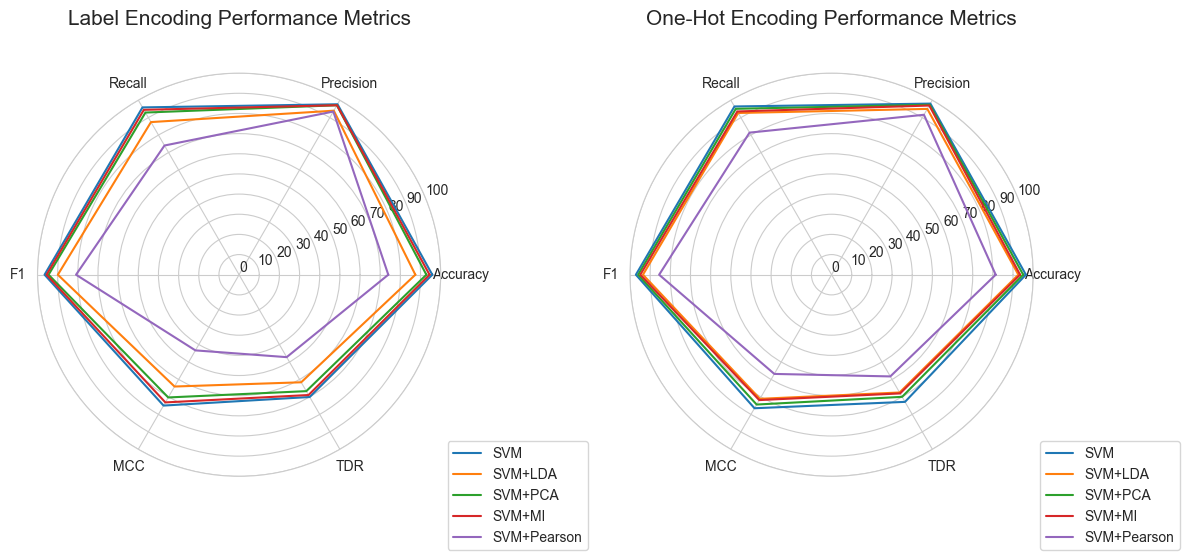

In [50]:
# Since the code block provided is incomplete due to the reset of the execution state,
# we'll re-import necessary libraries and re-define the DataFrame for both Label Encoding and One-Hot Encoding data.
# Then, we'll create side-by-side radar charts for both sets of data.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi

# Data for Label Encoding
label_encoding_data = pd.DataFrame({
    'Group': ['SVM', 'SVM+LDA', 'SVM+PCA', 'SVM+MI', 'SVM+Pearson'],
    'Accuracy': [95.84, 87.43, 92.90, 94.46, 74.01],
    'Precision': [97.64, 93.96, 97.07, 97.08, 93.48],
    'Recall': [95.84, 87.43, 92.90, 94.46, 74.01],
    'F1': [96.50, 89.91, 94.51, 95.51, 80.89],
    'MCC': [74.95, 64.04, 70.30, 73.14, 43.34],
    'TDR': [70.04, 61.61, 66.69, 68.91, 47.21]
})

# Data for One-Hot Encoding
one_hot_encoding_data = pd.DataFrame({
    'Group': ['SVM', 'SVM+LDA', 'SVM+PCA', 'SVM+MI', 'SVM+Pearson'],
    'Accuracy': [96.38, 92.64, 95.04, 93.51, 81.40],
    'Precision': [98.02, 94.98, 97.35, 96.91, 91.62],
    'Recall': [96.38, 92.64, 95.04, 93.51, 81.40],
    'F1': [97.08, 93.57, 95.95, 94.90, 85.55],
    'MCC': [76.48, 71.08, 74.36, 71.81, 56.82],
    'TDR': [72.83, 67.46, 69.95, 67.99, 58.25]
})

# Number of variables we're plotting.
categories = list(label_encoding_data)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Create a function to draw the radar chart
def draw_radar_chart(data, title, ax):
    for i, row in data.iterrows():
        values = row.drop('Group').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=row['Group'])
    ax.set_xticks(angles[:-1], categories)
    ax.set_yticks(np.arange(0, 101, 10))
    ax.set_ylim(0, 100)
    ax.set_title(title, size=15, y=1.1)
     # Add legend at the bottom left
    ax.legend(loc='lower left', bbox_to_anchor=(1, -0.2))

# Initialise the radar plot for Label Encoding
fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), nrows=1, ncols=2, subplot_kw=dict(polar=True))

# Plot for Label Encoding
draw_radar_chart(label_encoding_data, 'Label Encoding Performance Metrics', ax1)

# Plot for One-Hot Encoding
draw_radar_chart(one_hot_encoding_data, 'One-Hot Encoding Performance Metrics', ax2)

# Show the plot
plt.tight_layout()
plt.show()

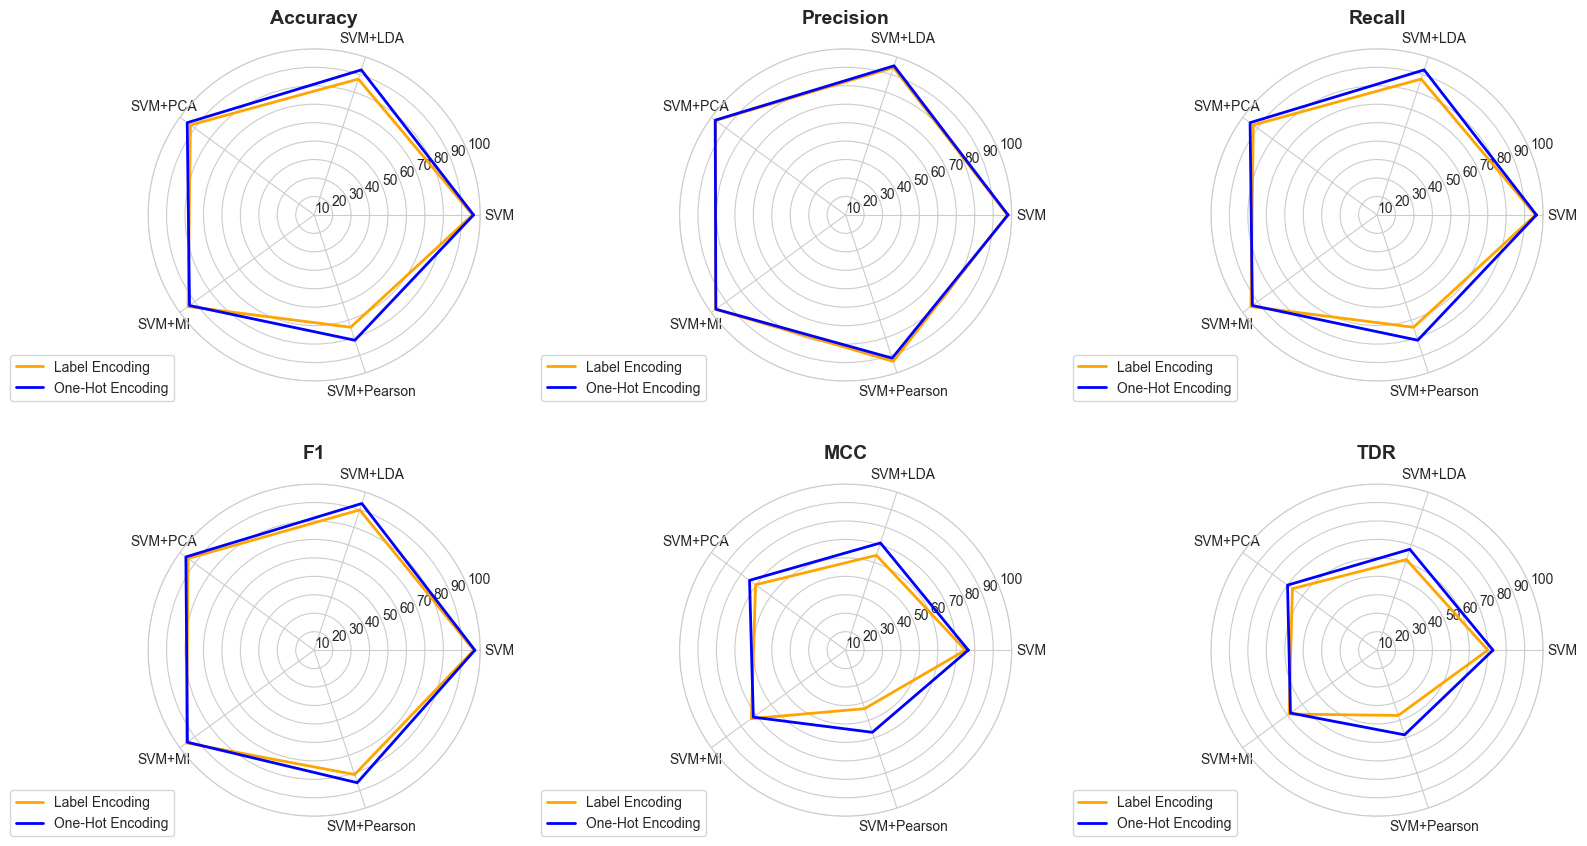

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Label Encoding and One-Hot Encoding
features = ['SVM', 'SVM+LDA', 'SVM+PCA', 'SVM+MI', 'SVM+Pearson']
label_encoding_data = {
    'Accuracy': [95.84, 87.43, 92.90, 94.46, 74.01],
    'Precision': [97.64, 93.96, 97.07, 97.08, 93.48],
    'Recall': [95.84, 87.43, 92.90, 94.46, 74.01],
    'F1': [96.50, 89.91, 94.51, 95.51, 80.89],
    'MCC': [74.95, 64.04, 70.30, 73.14, 43.34],
    'TDR': [70.04, 61.61, 66.69, 68.91, 47.21]
}
one_hot_encoding_data = {
    'Accuracy': [96.38, 92.64, 95.04, 93.51, 81.40],
    'Precision': [98.02, 94.98, 97.35, 96.91, 91.62],
    'Recall': [96.38, 92.64, 95.04, 93.51, 81.40],
    'F1': [97.08, 93.57, 95.95, 94.90, 85.55],
    'MCC': [76.48, 71.08, 74.36, 71.81, 56.82],
    'TDR': [72.83, 67.46, 69.95, 67.99, 58.25]
}

# Number of variables we're plotting.
num_vars = len(features)

# Compute angle each axis will be plotted
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # to complete the loop

# Function to create radar charts
def create_radar_chart(ax, data, title, color, metrics):
    values = data + data[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=title)
    ax.fill(angles, values, alpha=0)  # No fill
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    ax.set_rgrids([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    ax.set_title(metrics, size=14, position=(0.5, 1.5), fontweight='bold')

# Create figure
fig, axs = plt.subplots(figsize=(18, 10), nrows=2, ncols=3, subplot_kw=dict(polar=True))

# Adjust the subplot layout
fig.subplots_adjust(wspace=0.6, hspace=0.3)

# Create a radar chart for each metric
metrics = list(label_encoding_data.keys())

for i, metric in enumerate(metrics):
    create_radar_chart(axs.flat[i], label_encoding_data[metric], 'Label Encoding', 'orange', metric)
    create_radar_chart(axs.flat[i], one_hot_encoding_data[metric], 'One-Hot Encoding', 'blue', metric)
    axs.flat[i].legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show plot
plt.show()